In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.shape

(344, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


UNIVARIATE

In [5]:
#Penguin species
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

([<matplotlib.patches.Wedge at 0x7cc2b763f520>,
 [Text(0.19980052901159365, 1.0817022458175296, 'Adelie'),
  Text(-0.7918938277833127, -0.7634816078457249, 'Gentoo'),
  Text(0.894618705053837, -0.6400448207491378, 'Chinstrap')],
 [Text(0.10898210673359653, 0.5900194068095616, '44.2%'),
  Text(-0.4319420878818069, -0.4164445133703954, '36.0%'),
  Text(0.4879738391202747, -0.34911535677225697, '19.8%')])

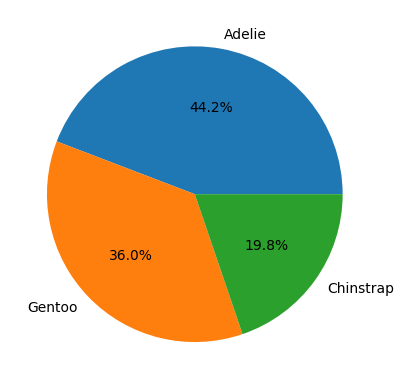

In [6]:
plt.pie(df.species.value_counts(), labels = ['Adelie', 'Gentoo', 'Chinstrap'], autopct = '%1.1f%%')

In [7]:
#Islands
df.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

([<matplotlib.patches.Wedge at 0x7cc2b753c700>,
 [Text(0.040174244511466346, 1.099266132507471, 'Biscoe'),
  Text(-0.5383596868970475, -0.9592543184808255, 'Dream'),
  Text(0.9782763205126381, -0.502966639772713, 'Torgersen')],
 [Text(0.021913224278981642, 0.5995997086404388, '48.8%'),
  Text(-0.29365073830748045, -0.5232296282622685, '36.0%'),
  Text(0.5336052657341662, -0.2743454398760253, '15.1%')])

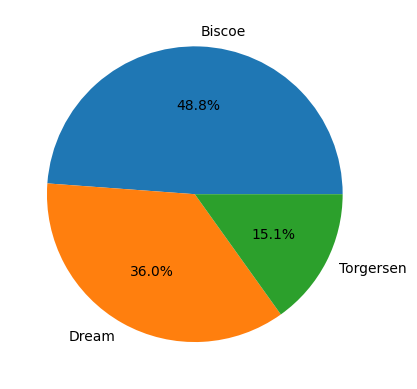

In [8]:
plt.pie(df.island.value_counts(), labels = ['Biscoe', 'Dream', 'Torgersen'], autopct = '%1.1f%%')

BIVARIATE

<Axes: xlabel='species', ylabel='body_mass_g'>

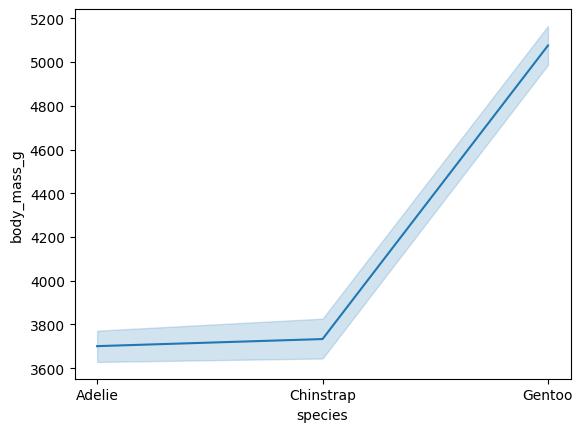

In [9]:
#species and bodymass
sns.lineplot(x = df.species, y = df.body_mass_g)

<Axes: xlabel='species', ylabel='island'>

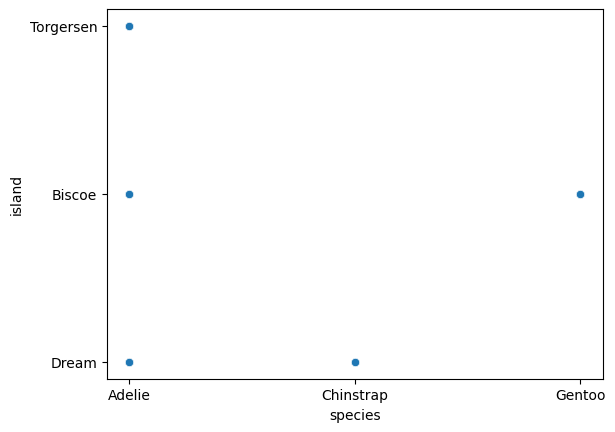

In [10]:
#species and island
sns.scatterplot(x = df.species, y = df.island)

MULTIVARIATE

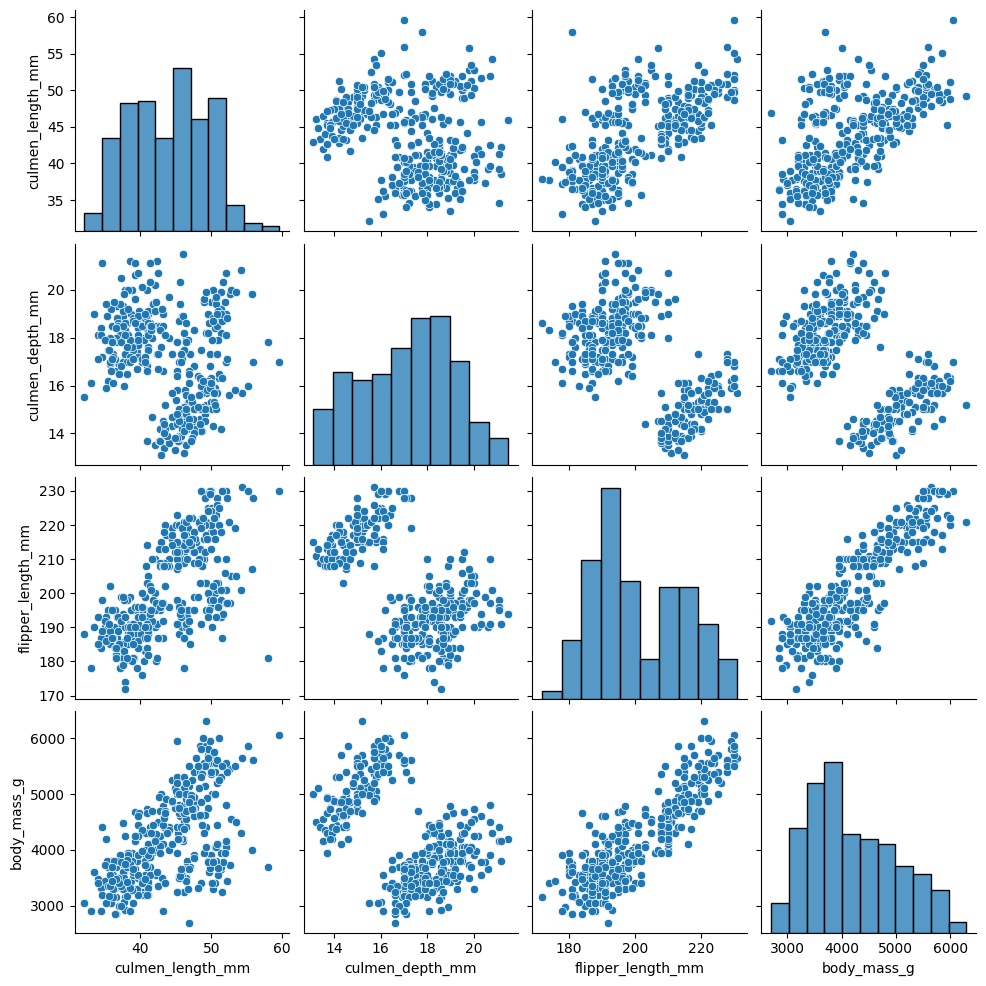

In [11]:
sns.pairplot(df)

DESCRIPTIVE STATISTICS

In [13]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


NULL VALUES

In [14]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [15]:
#Replacing null values for numeric columns with median
df.culmen_length_mm.fillna(df.culmen_length_mm.median(), inplace = True)
df.culmen_depth_mm.fillna(df.culmen_depth_mm.median(), inplace = True)
df.flipper_length_mm.fillna(df.flipper_length_mm.median(), inplace = True)
df.body_mass_g.fillna(df.body_mass_g.median(), inplace = True)

In [16]:
df.sex.value_counts()  # sex column contains male, female and a dot

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [17]:
df['sex'] = df['sex'].replace('.', np.nan)
df.sex.value_counts() #replacing the dot with nan

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [20]:
#Replacing null values for categorical column with its mode
df['sex'].fillna(df['sex'].mode()[0], inplace = True)

In [21]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

OUTLIERS

In [22]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

<Axes: >

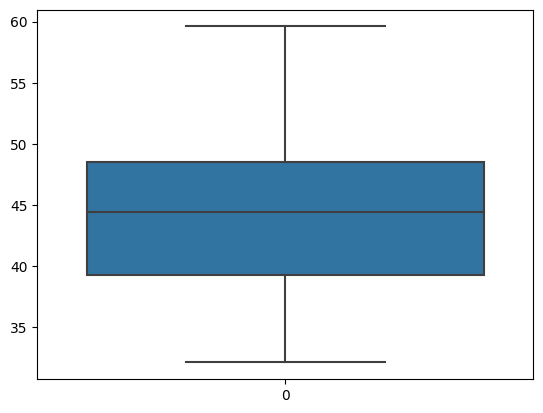

In [23]:
sns.boxplot(df.culmen_length_mm) #NO OUTLIERS PRESENT

<Axes: >

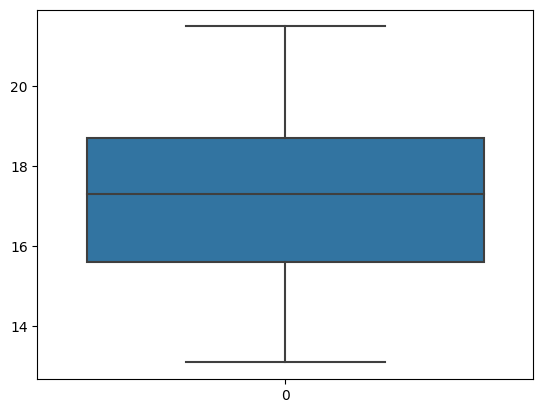

In [24]:
sns.boxplot(df.culmen_depth_mm) #NO OUTLIERS PRESENT

<Axes: >

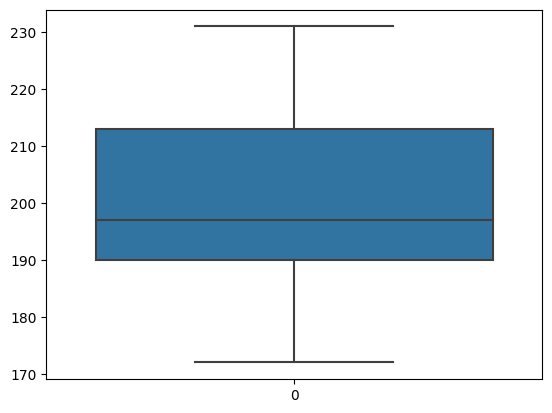

In [25]:
sns.boxplot(df.flipper_length_mm) #NO OUTLIERS PRESENT

<Axes: >

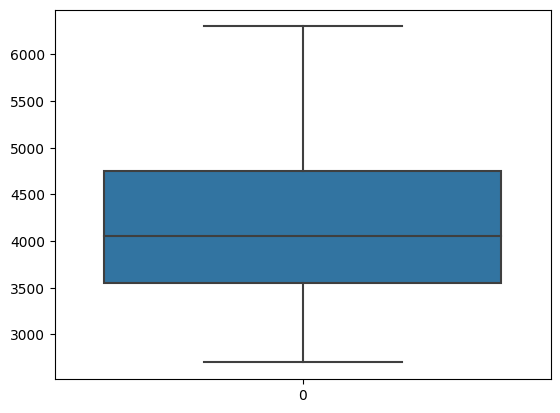

In [26]:
sns.boxplot(df.body_mass_g) #NO OUTLIERS PRESENT

ENCODING

In [27]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()

In [30]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [31]:
df.species = le.fit_transform(df.species)
df.island = le.fit_transform(df.island)
df.sex = le.fit_transform(df.sex)

In [32]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,1
1,0,2,39.50,17.4,186.0,3800.0,0
2,0,2,40.30,18.0,195.0,3250.0,0
3,0,2,44.45,17.3,197.0,4050.0,1
4,0,2,36.70,19.3,193.0,3450.0,0


CORRELATION

In [43]:
df.corr()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.635659,0.728706,-0.741282,0.850819,0.747547,0.010240
island,-0.635659,1.000000,-0.351189,0.567701,-0.562957,-0.558500,0.002893
culmen_length_mm,0.728706,-0.351189,1.000000,-0.235000,0.655858,0.594925,0.322871
culmen_depth_mm,-0.741282,0.567701,-0.235000,1.000000,-0.583832,-0.471942,0.354791
flipper_length_mm,0.850819,-0.562957,0.655858,-0.583832,1.000000,0.871221,0.241941
body_mass_g,0.747547,-0.558500,0.594925,-0.471942,0.871221,1.000000,0.407107
sex,0.010240,0.002893,0.322871,0.354791,0.241941,0.407107,1.000000


In [45]:
df.corr().species

species              1.000000
island              -0.635659
culmen_length_mm     0.728706
culmen_depth_mm     -0.741282
flipper_length_mm    0.850819
body_mass_g          0.747547
sex                  0.010240
Name: species, dtype: float64

<Axes: >

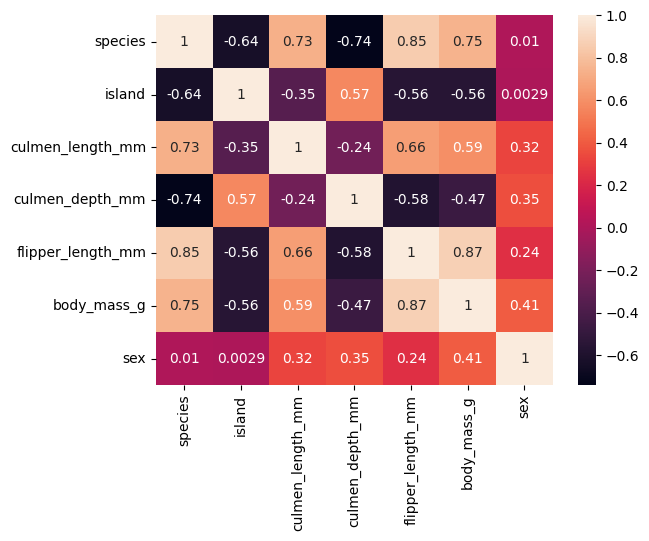

In [46]:
sns.heatmap(df.corr(), annot = True)

INDEPENDENT/DEPENDENT SPLIT

In [48]:
x = df.drop(columns = ['species'], axis = 1) #independent
y = df.species #dependent

In [51]:
x.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,1
1,2,39.50,17.4,186.0,3800.0,0
2,2,40.30,18.0,195.0,3250.0,0
3,2,44.45,17.3,197.0,4050.0,1
4,2,36.70,19.3,193.0,3450.0,0


In [52]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

SCALING

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scale = MinMaxScaler() #values between 0 and 1

In [56]:
x_scaled = pd.DataFrame(scale.fit_transform(x), columns = x.columns)
x_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.0


TRAIN TEST SPLIT

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)#independent, dependent variable, test size

In [59]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 6)
(104, 6)
(240,)
(104,)
